# INFO371 Problem Set: Classification and k-Nearest Neighbors

## Instructions

* Please write clearly! Answer each question in a way that if the code chunks are removed from your document, the result are still readable!
* Discussing the solutions and getting help is all right, but you have to solve the problem your own. Do not copy-paste from others!
* Make sure you show your work!

---

## Introduction
In this assignment, we are going to be looking at the Wisconsin Breast Cancer Dataset (WBCD).
The dataset orginates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) and it contains
569 cases from November 1995.  

The data includes tumor diagnosis, with "M" meaning cancer (malignant) and "B" meaning no cancer (benign), and 10 features describing the physical properties of the cell nuclei from biopsy samples.  Each
feature is represented three times, once for mean, once for standard deviation, and once for the worst values.  More specifically, the variables are: 

* id -> case id
* Diagnosis -> (M = malignant, B = benign).  These are the labels or the part you normally predict . 
* ten real-valued features computed for each cell nucleus. For each feature the mean, standard error, and ''worst'' or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius. 
   
It contains the following features:
   * radius -> mean of distances from center to points on the
     perimeter
   * texture -> standard deviation of gray-scale values
   * perimeter
   * area
   * smoothness -> local variation in radius lengths
   * compactness -> $ perimeter^2 / area - 1.0$
   * concavity -> severity of concave portions of the contour
   * concpoints -> number of concave portions of the contour
   * symmetry
   * fracdim -> fractal dimension, $coastline\ approximation - 1$


Your task is to predict diagnosis (cancer or not cancer) based on this data, and our focus is to use $k$-NN and different metrics.

## Explore the data  and  Experimental Setup (13pt)

As the first step, explore the data and establish a baseline!

1. Load the data, Ignore id.


2. Create a table where you show ranges (min and max) for each variable.  You may include more statistics you consider useful. 



3. Randomly select 80% of the data and put this in a training dataset df, and place the remaining 20% in a testing dataset df. 



4. Using this test/train spilt, create a naive model -- i.e. a model that predicts every case to the majority category/label. What is the training vs testing accuracy of this model? Is this what you expected, and why?



5. Add code to measure the running time of your algorithm. How long does it take to predict labels for the test data? 

    Note: you can use python's time library to meaure runtime!

In [31]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
import time



df = pd.read_csv("wdbc.csv.bz2")

# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

y = df.diagnosis
df = df.drop(columns=['id', 'diagnosis'])

print(df.max())
print()
print(df.min())
print()

t0 = time.time()

majority_class = y.value_counts().idxmax()

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.20)

naive_train_predictions = np.full((len(y_train)), majority_class)
naive_test_predictions = np.full((len(y_test)), majority_class)

train_accuracy = accuracy_score(y_train, naive_train_predictions)
test_accuracy = accuracy_score(y_test, naive_test_predictions)


# Timing end
t1 = time.time()
total_time = t1 - t0

# Printing results
print("Naive Model Training Accuracy:", train_accuracy)
print("Naive Model Testing Accuracy:", test_accuracy)
print("Time taken to predict labels for the test data:", total_time)

radius.mean            28.11000
texture.mean           39.28000
perimeter.mean        188.50000
area.mean            2501.00000
smoothness.mean         0.16340
compactness.mean        0.34540
concavity.mean          0.42680
concpoints.mean         0.20120
symmetry.mean           0.30400
fracdim.mean            0.09744
radius.se               2.87300
texture.se              4.88500
perimeter.se           21.98000
area.se               542.20000
smoothness.se           0.03113
compactness.se          0.13540
concavity.se            0.39600
concpoints.se           0.05279
symmetry.se             0.07895
fracdim.se              0.02984
radius.worst           36.04000
texture.worst          49.54000
perimeter.worst       251.20000
area.worst           4254.00000
smoothness.worst        0.22260
compactness.worst       1.05800
concavity.worst         1.25200
concpoints.worst        0.29100
symmetry.worst          0.66380
fracdim.worst           0.20750
dtype: float64

radius.mean            6

The results of the testing follow expectation, the naive model is poor at predicting the outcomes as it does not learn from the data. The timing is also incredibly fast as the data itself is not being used besides the frequency of the label.

## Compare Performance to k-NN (32pts)

Now that you have a baseline performance, your next task is to compare the performace using a k-NN model and the Mahalanobis distance function. For these experiments, make sure you use the same test/train split as you did for your baseline.    

6. Using the same test/train split as the naive model, create a 1-NN model with Mahalanobis distance metric the then report what is the training vs testing accuracy of this model. How much better did 1-NN do compared to the naive baseline? 


7. Add code to measure the running time of your algorithm. How long does it take to predict labels for the test data? 


8. Now repeat steps 6-7 (i.e. get training and testing accuracy of the model and the runtime) for k values from 2 to 15. 


9. Using those resilts, create two line charts: 1) comparing performance and 2) comparing runtime as you vary k. Your k values should be on the x axis, and your y axis should be accuracy or run time in seconds. 


10. Describe your observations from these experiments. For example, this about whether there are any trade-offs with chosing certain k values. Is there anything about the data/experiment/model that impacts performance in a good and bad way? How well did the k-nn model do compared to the naive baseline? 

1.0
0.7894736842105263
time:  0.06341862678527832



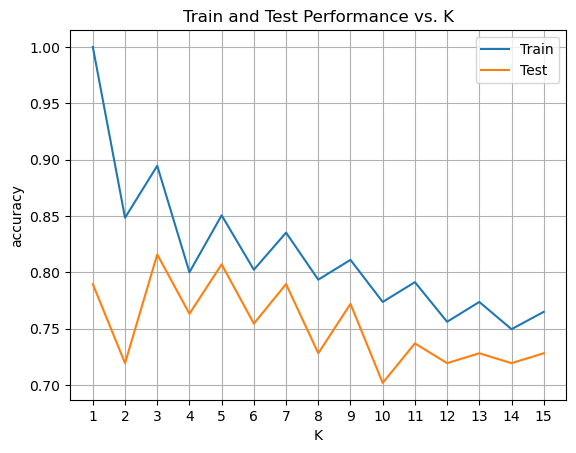

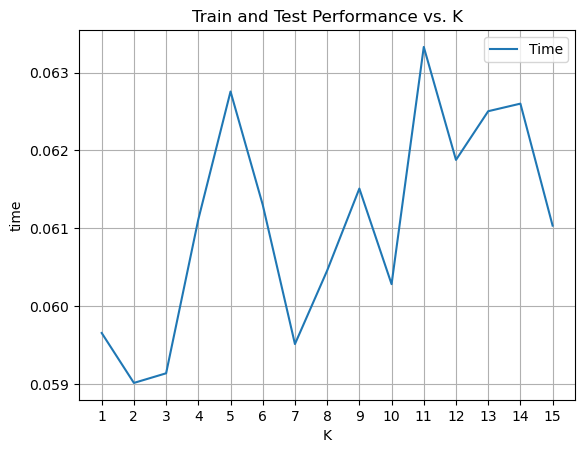

In [58]:
#code goes here
import matplotlib.pyplot as plt
t0 = time.time()
Sigma = np.cov(x_train, rowvar=False)
Sigma_inv = np.linalg.inv(Sigma)
m = KNeighborsClassifier(n_neighbors=1,
                         metric="mahalanobis",
                         metric_params={"VI":Sigma_inv})
m.fit(x_train, y_train)
print(accuracy_score(y_train, m.predict(x_train)))
print(accuracy_score(y_test, m.predict(x_test)))
t1 = time.time()
total_time = t1 - t0
print('time: ', total_time)
print()

mah_best = []
for k in range(1,16):
    t0 = time.time()
    Sigma = np.cov(x_train, rowvar=False)
    Sigma_inv = np.linalg.inv(Sigma)
    m = KNeighborsClassifier(n_neighbors=k,
                         metric="mahalanobis",
                         metric_params={"VI":Sigma_inv})
    m.fit(x_train, y_train)
    train = accuracy_score(y_train, m.predict(x_train))
    test = accuracy_score(y_test, m.predict(x_test))
    t1 = time.time()
    total_time = t1 - t0
    mah_best.append((train, test, k, total_time))

train_data = [t[0] for t in mah_best]
test_data = [t[1] for t in mah_best]
k = [t[2] for t in mah_best]
total_time = [t[3] for t in mah_best]

plt.plot(k, train_data , label='Train')
plt.plot(k, test_data, label='Test')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.title('Train and Test Performance vs. K')
plt.legend()
plt.grid(True)
plt.xticks(k)
plt.show()

plt.plot(k, total_time , label='Time')
plt.xlabel('K')
plt.ylabel('time')
plt.title('Train and Test Performance vs. K')
plt.legend()
plt.grid(True)
plt.xticks(k)
plt.show()

1-NN was signifcantly better than baseline but overall not very accurate. Predicting using test labels is more costly than the naive model by an order of magnitude. The results of varying K indicate a trade off where neighbor values of 3 or 5 performed best and as K increased the run time did as well while the accuracy decreased. The sweet spot for this data is around 3 or 5 neighbors.

## Feature Transformation (30pts)

As we talked about in class, normalizing your features can have a huge impact on k-nn model performance. When we ran the experiments above, we did not normalize our features! let's now examine how this might impact the model. 

11. Your first step is to write your own normalization function for this dataset and apply it to your training and testing data. Remeber that normalization typically takes in an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation). Note that you might already have these numbers in the dataset itself! 



12. With your features normalized, repeat the experiments you did earlier by doing the following: 
        a. Create a k-nn model with Mahalanobis distance metric
        b. run the model for all k-values between 1-15
        c. report the training and testing accuracy and the runtime 



13. Using those resilts, create two line charts: 1) comparing performance and 2) comparing runtime as you vary k. Your k values should be on the x axis, and your y axis should be accuracy or run time in seconds.



14. Now compare your performance between the normalized and non-normalized datasets. How much did normalization impact performance?  It might help to show both performances on the same line chart to really compare.

1.0
0.8245614035087719
time:  0.06144380569458008



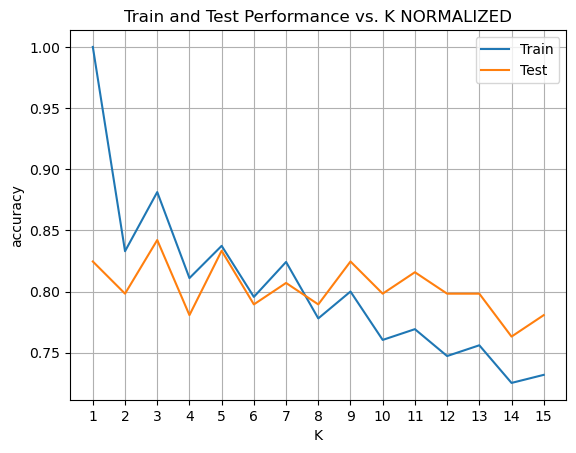

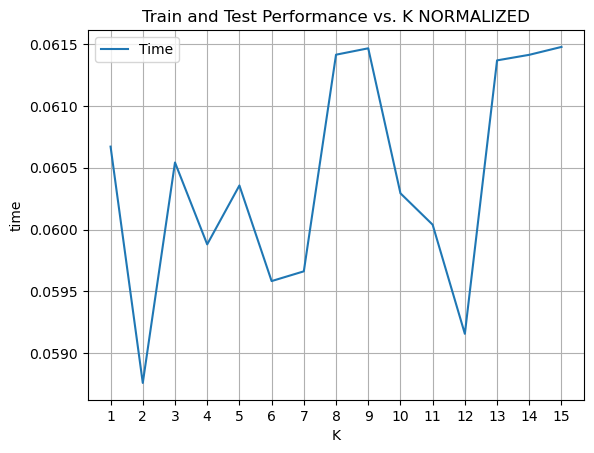

In [72]:
#code goes here 
def normalize_column(column):
    return (column - column.mean()) / column.std()

# Extract feature columns for mean, standard error, and worst case
mean_columns = ['radius.mean', 'texture.mean', 'perimeter.mean', 'area.mean',
                'smoothness.mean', 'compactness.mean', 'concavity.mean',
                'concpoints.mean', 'symmetry.mean', 'fracdim.mean']
se_columns = ['radius.se', 'texture.se', 'perimeter.se', 'area.se',
              'smoothness.se', 'compactness.se', 'concavity.se',
              'concpoints.se', 'symmetry.se', 'fracdim.se']
worst_columns = ['radius.worst', 'texture.worst', 'perimeter.worst',
                 'area.worst', 'smoothness.worst', 'compactness.worst',
                 'concavity.worst', 'concpoints.worst', 'symmetry.worst',
                 'fracdim.worst']
normal = pd.DataFrame()
for col in mean_columns + se_columns + worst_columns:
    normal[col] = normalize_column(df[col])

    
x_train, x_test, y_train, y_test = train_test_split(normal, y, test_size=0.20)
t0 = time.time()
Sigma = np.cov(x_train, rowvar=False)
Sigma_inv = np.linalg.inv(Sigma)
m = KNeighborsClassifier(n_neighbors=1,
                         metric="mahalanobis",
                         metric_params={"VI":Sigma_inv})
m.fit(x_train, y_train)
print(accuracy_score(y_train, m.predict(x_train)))
print(accuracy_score(y_test, m.predict(x_test)))
t1 = time.time()
total_time = t1 - t0
print('time: ', total_time)
print()

mah_best = []
for k in range(1,16):
    t0 = time.time()
    Sigma = np.cov(x_train, rowvar=False)
    Sigma_inv = np.linalg.inv(Sigma)
    m = KNeighborsClassifier(n_neighbors=k,
                         metric="mahalanobis",
                         metric_params={"VI":Sigma_inv})
    m.fit(x_train, y_train)
    train = accuracy_score(y_train, m.predict(x_train))
    test = accuracy_score(y_test, m.predict(x_test))
    t1 = time.time()
    total_time = t1 - t0
    mah_best.append((train, test, k, total_time))

train_data = [t[0] for t in mah_best]
test_data = [t[1] for t in mah_best]
k = [t[2] for t in mah_best]
total_time = [t[3] for t in mah_best]

plt.plot(k, train_data , label='Train')
plt.plot(k, test_data, label='Test')
plt.xlabel('K')
plt.ylabel('accuracy')
plt.title('Train and Test Performance vs. K NORMALIZED')
plt.legend()
plt.grid(True)
plt.xticks(k)
plt.show()

plt.plot(k, total_time , label='Time')
plt.xlabel('K')
plt.ylabel('time')
plt.title('Train and Test Performance vs. K NORMALIZED')
plt.legend()
plt.grid(True)
plt.xticks(k)
plt.show()

After normalizing the data it is clear that it increased performance by between 3-5% which is substantial. Runtime was unaffected by normalization

## Cross-Validation (25pts)

Up until this point, all of our experiments have used the same test/train spilt. But that might not reflect average peformance. We could have, for example, gotten lucky and randomly chosen a test/train split that happened to improve performance. Instead, we want to get average performance over a number of data splits to get a better idea of how our model is working. 

To do this, we need to use cross-validation to get average performance. For our experiments, use 10-fold cross-validation sames as you did in lab. 

15. Repeat the experiments you did earlier on the normalized dataset by doing the following: 
        a. Create a k-nn model with Mahalanobis distance metric
        b. run the model with 10-fold cross validation for all k-values between 1-15
        c. report the average training and average testing accuracy and the average runtime for all k values 
      
      
16. Using those resilts, create two line charts: 1) comparing average performance and 2) comparing average runtime as you vary k. Your k values should be on the x axis, and your y axis should be accuracy or run time in seconds.



17. Describe your observations from these experiments. Did anything change when you did cross-validation? 

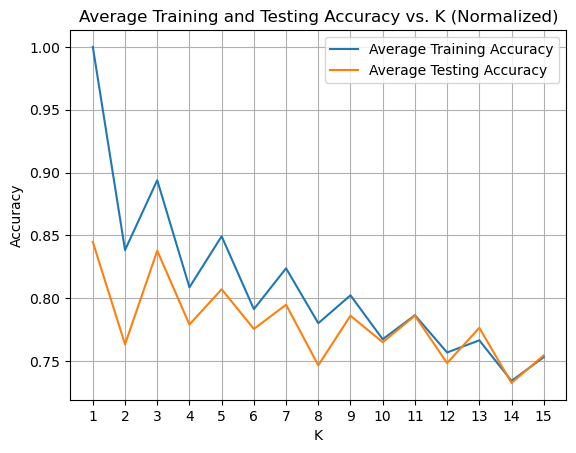

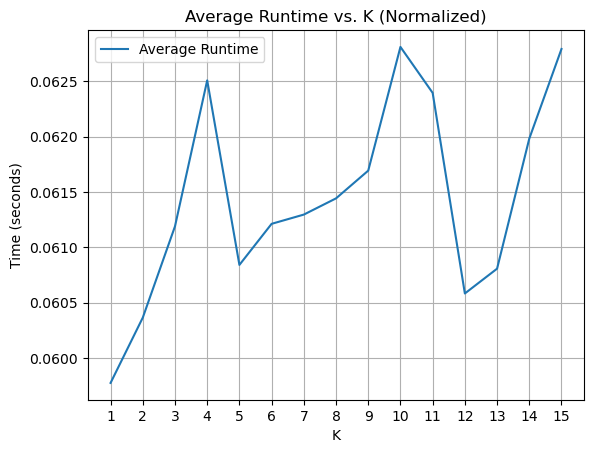

In [74]:
mah_results = []
for k in range(1, 16):
    train_acc = []
    test_acc = []
    times = []
    for _ in range(10):
        x_train, x_test, y_train, y_test = train_test_split(normal, y, test_size=0.20)
        t0 = time.time()
        Sigma = np.cov(x_train, rowvar=False)
        Sigma_inv = np.linalg.inv(Sigma)
        m = KNeighborsClassifier(n_neighbors=k,
                                 metric="mahalanobis",
                                 metric_params={"VI": Sigma_inv})
        m.fit(x_train, y_train)
        train_acc.append(accuracy_score(y_train, m.predict(x_train)))
        test_acc.append(accuracy_score(y_test, m.predict(x_test)))
        t1 = time.time()
        times.append(t1 - t0)
    
    avg_train_acc = np.mean(train_acc)
    avg_test_acc = np.mean(test_acc)
    avg_time = np.mean(times)
    
    mah_results.append((avg_train_acc, avg_test_acc, avg_time))


avg_train_accs = [res[0] for res in mah_results]
avg_test_accs = [res[1] for res in mah_results]
avg_runtimes = [res[2] for res in mah_results]


plt.plot(range(1, 16), avg_train_accs, label='Average Training Accuracy')
plt.plot(range(1, 16), avg_test_accs, label='Average Testing Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Average Training and Testing Accuracy vs. K (Normalized)')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 16))
plt.show()

plt.plot(range(1, 16), avg_runtimes, label='Average Runtime')
plt.xlabel('K')
plt.ylabel('Time (seconds)')
plt.title('Average Runtime vs. K (Normalized)')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 16))
plt.show()

Cross validating smoothed the results out but confirmed the results of the previous anaylsis. 

## Extra Credit (+10 pts)

For extra credit, repeat the cross-validation experiments (i.e. varying the k-values) on the normalized dataset BUT this time compare performance and runtime between all 4 distance metrics you used in lab. Then analyze your results and discuss the benefits/trade-offs for each of the metrics for this dataset. 

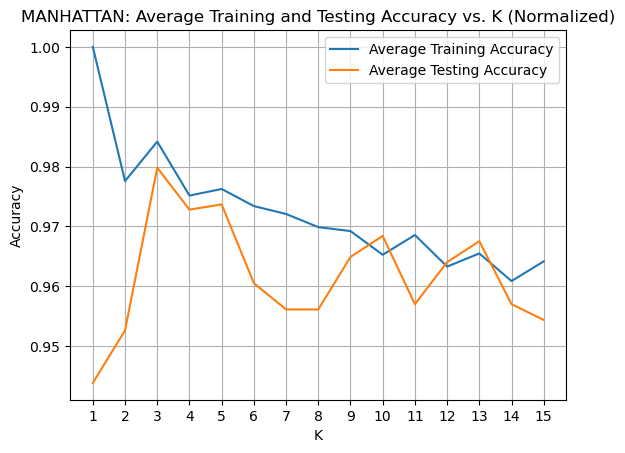

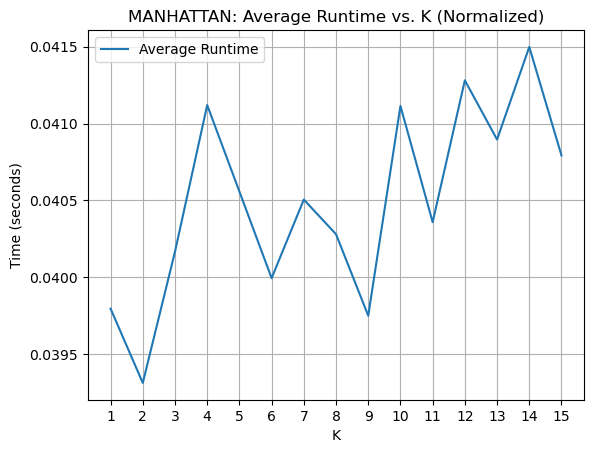

In [78]:
man_results = []
for k in range(1, 16):
    train_acc = []
    test_acc = []
    times = []
    for _ in range(10):
        x_train, x_test, y_train, y_test = train_test_split(normal, y, test_size=0.20)
        t0 = time.time()
        m = KNeighborsClassifier(n_neighbors=k,
                                 metric="manhattan")
        m.fit(x_train, y_train)
        train_acc.append(accuracy_score(y_train, m.predict(x_train)))
        test_acc.append(accuracy_score(y_test, m.predict(x_test)))
        t1 = time.time()
        times.append(t1 - t0)
    
    avg_train_acc = np.mean(train_acc)
    avg_test_acc = np.mean(test_acc)
    avg_time = np.mean(times)
    
    man_results.append((avg_train_acc, avg_test_acc, avg_time))


avg_train_accs = [res[0] for res in man_results]
avg_test_accs = [res[1] for res in man_results]
avg_runtimes = [res[2] for res in man_results]


plt.plot(range(1, 16), avg_train_accs, label='Average Training Accuracy')
plt.plot(range(1, 16), avg_test_accs, label='Average Testing Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('MANHATTAN: Average Training and Testing Accuracy vs. K (Normalized)')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 16))
plt.show()

plt.plot(range(1, 16), avg_runtimes, label='Average Runtime')
plt.xlabel('K')
plt.ylabel('Time (seconds)')
plt.title('MANHATTAN: Average Runtime vs. K (Normalized)')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 16))
plt.show()

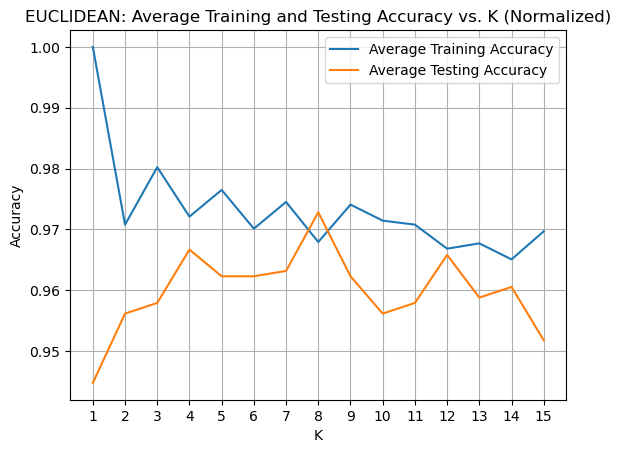

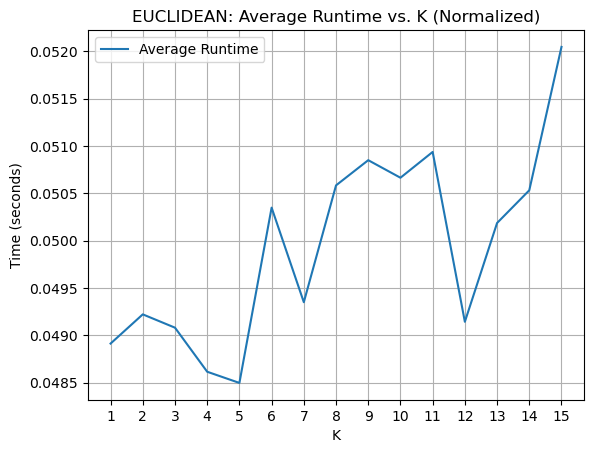

In [80]:
euc_results = []
for k in range(1, 16):
    train_acc = []
    test_acc = []
    times = []
    for _ in range(10):
        x_train, x_test, y_train, y_test = train_test_split(normal, y, test_size=0.20)
        t0 = time.time()
        m = KNeighborsClassifier(n_neighbors=k,
                                 )
        m.fit(x_train, y_train)
        train_acc.append(accuracy_score(y_train, m.predict(x_train)))
        test_acc.append(accuracy_score(y_test, m.predict(x_test)))
        t1 = time.time()
        times.append(t1 - t0)
    
    avg_train_acc = np.mean(train_acc)
    avg_test_acc = np.mean(test_acc)
    avg_time = np.mean(times)
    
    euc_results.append((avg_train_acc, avg_test_acc, avg_time))


avg_train_accs = [res[0] for res in euc_results]
avg_test_accs = [res[1] for res in euc_results]
avg_runtimes = [res[2] for res in euc_results]


plt.plot(range(1, 16), avg_train_accs, label='Average Training Accuracy')
plt.plot(range(1, 16), avg_test_accs, label='Average Testing Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('EUCLIDEAN: Average Training and Testing Accuracy vs. K (Normalized)')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 16))
plt.show()

plt.plot(range(1, 16), avg_runtimes, label='Average Runtime')
plt.xlabel('K')
plt.ylabel('Time (seconds)')
plt.title('EUCLIDEAN: Average Runtime vs. K (Normalized)')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 16))
plt.show()

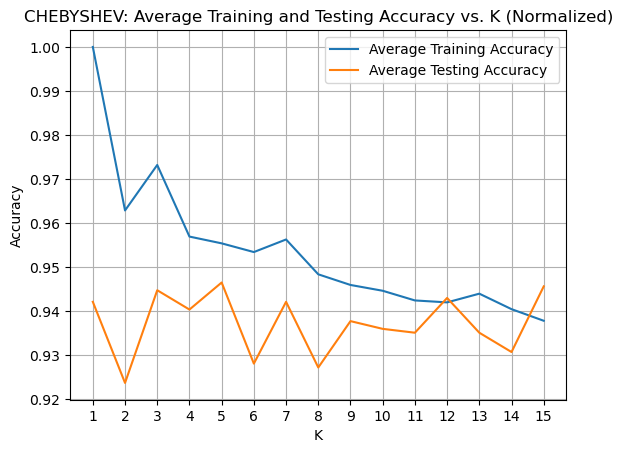

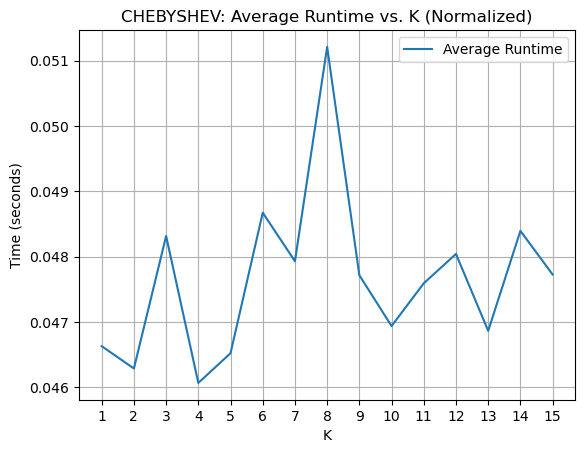

In [81]:
cheb_results = []
for k in range(1, 16):
    train_acc = []
    test_acc = []
    times = []
    for _ in range(10):
        x_train, x_test, y_train, y_test = train_test_split(normal, y, test_size=0.20)
        t0 = time.time()
        m = KNeighborsClassifier(n_neighbors=k,
                                 metric='chebyshev')
        m.fit(x_train, y_train)
        train_acc.append(accuracy_score(y_train, m.predict(x_train)))
        test_acc.append(accuracy_score(y_test, m.predict(x_test)))
        t1 = time.time()
        times.append(t1 - t0)
    
    avg_train_acc = np.mean(train_acc)
    avg_test_acc = np.mean(test_acc)
    avg_time = np.mean(times)
    
    cheb_results.append((avg_train_acc, avg_test_acc, avg_time))


avg_train_accs = [res[0] for res in cheb_results]
avg_test_accs = [res[1] for res in cheb_results]
avg_runtimes = [res[2] for res in cheb_results]


plt.plot(range(1, 16), avg_train_accs, label='Average Training Accuracy')
plt.plot(range(1, 16), avg_test_accs, label='Average Testing Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('CHEBYSHEV: Average Training and Testing Accuracy vs. K (Normalized)')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 16))
plt.show()

plt.plot(range(1, 16), avg_runtimes, label='Average Runtime')
plt.xlabel('K')
plt.ylabel('Time (seconds)')
plt.title('CHEBYSHEV: Average Runtime vs. K (Normalized)')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 16))
plt.show()

Based on the results of this anaylsis it is suprisingly clear that both the manhattan and euclidean norm as distance metrics are almost perfect predictors on average achieving an incredile 97% and 98% accuracy in testing even beating the training splits. Runtimes between the models are different but not on orders of magnitude.